# **Importing Packages**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, AveragePooling2D
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading Data**

In [ ]:
X = np.load("/content/drive/MyDrive/Stem Proyectp/Project/DataStorage/set4_features.npy")
y = np.load("/content/drive/MyDrive/Stem Proyectp/Project/DataStorage/set4_labels.npy")

In [ ]:
X2 = np.load("/content/drive/MyDrive/Stem Proyectp/Project/DataStorage/set2_features.npy")
y2 = np.load("/content/drive/MyDrive/Stem Proyectp/Project/DataStorage/set2_labels.npy")

X_train2, X_rem2, y_train2, y_rem2 = train_test_split(X2, y2, test_size = 0.3, random_state = 17)
X_test2, X_valid2, y_test2, y_valid2 = train_test_split(X_rem2, y_rem2, test_size = 0.5, random_state = 9)

In [ ]:
print(X_test2.shape)
print(y.shape)

(154, 256, 256, 1)
(1025,)


In [ ]:
# 70/15/15 train/test/valid split
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size = 0.3, random_state = 17)
X_test, X_valid, y_test, y_valid = train_test_split(X_rem, y_rem, test_size = 0.5, random_state = 9)

# **Creating Model Architecture and Functions**

**Creating Function for Future Model Testing**

In [ ]:
def testModel(test_images, test_labels):
  correct = 0

  outputs = []
  spec_acc = []
  total = len(test_images)

  hem_total = 0
  isch_total = 0
  norm_total = 0

  hem = 0
  isch = 0
  norm = 0

  false_hem = 0
  false_isch = 0
  false_norm = 0

  predictions = model.predict(test_images)
  
  for i in range(0, len(test_images)):
    predictions_list = list(predictions[i])

    maximum = max(predictions_list)
    prediction = predictions_list.index(maximum)

    if prediction == test_labels[i]:
      correct += 1

    if prediction == 0:
      outputs.append(1 - maximum)
    
    else:
      outputs.append(prediction)

    if test_labels[i] == 0:
      norm_total += 1
      if prediction == 0:
        norm += 1

    elif test_labels[i] == 1:
      hem_total += 1
      if prediction == 1:
        hem += 1

    elif test_labels[i] == 2:
      isch_total += 1
      if  prediction == 2:
        isch += 1

    if prediction == 0 and test_labels[i] != 0:
      false_norm += 1
    elif prediction == 1 and test_labels[i] != 1:
      false_hem += 1
    elif prediction == 2 and test_labels[i] != 2:
      false_isch += 1

  accuracy = float(correct) / total

  spec_acc.append(float(norm)/norm_total)
  spec_acc.append(float(hem)/hem_total)
  spec_acc.append(float(isch)/isch_total)

  spec_acc.append([false_norm, false_hem, false_isch])

  return accuracy, outputs, spec_acc

**Creating model architecture using Tensorflow backend**

In [ ]:
class BuildModel:
  def layer1(model):
    model.add(Conv2D(32, (9, 9), activation='relu', input_shape=X.shape[1:]))
    model.add(MaxPooling2D(pool_size=(3, 3)))

  def convLayer(model):
    model.add(Conv2D(128, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

  def convLayer2(model):
    model.add(Conv2D(64, (7, 7), activation = 'relu'))
    model.add(MaxPooling2D(pool_size= (3, 3)))

  def denseLayer(model):
    model.add(Flatten())
    model.add(Dense(64, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation = 'softmax'))

In [ ]:
model = Sequential()

BuildModel.layer1(model)
BuildModel.convLayer2(model)
BuildModel.convLayer2(model)
BuildModel.convLayer(model)
BuildModel.denseLayer(model)

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = 'adam',
              metrics = ['accuracy'])

# **Model Training and Testing**

In [ ]:
training = model.fit(X_train, y_train, batch_size = 32, epochs = 20, validation_data= (X_valid, y_valid))

Epoch 1/20
23/23 [==============================] - 4s 146ms/step - loss: 0.9276 - accuracy: 0.5844 - val_loss: 0.7057 - val_accuracy: 0.7208
Epoch 2/20
23/23 [==============================] - 3s 135ms/step - loss: 0.6413 - accuracy: 0.7001 - val_loss: 0.6109 - val_accuracy: 0.7208
Epoch 3/20
23/23 [==============================] - 3s 135ms/step - loss: 0.5754 - accuracy: 0.7294 - val_loss: 0.5417 - val_accuracy: 0.7597
Epoch 4/20
23/23 [==============================] - 3s 135ms/step - loss: 0.5308 - accuracy: 0.7601 - val_loss: 0.5229 - val_accuracy: 0.7403
Epoch 5/20
23/23 [==============================] - 3s 136ms/step - loss: 0.4981 - accuracy: 0.7643 - val_loss: 0.5081 - val_accuracy: 0.7532
Epoch 6/20
23/23 [==============================] - 3s 134ms/step - loss: 0.4479 - accuracy: 0.8020 - val_loss: 0.4703 - val_accuracy: 0.7922
Epoch 7/20
23/23 [==============================] - 3s 134ms/step - loss: 0.4471 - accuracy: 0.7992 - val_loss: 0.4787 - val_accuracy: 0.7727
Epoch 

In [ ]:
model.evaluate(X_test2, y_test2)

5/5 [==============================] - 0s 44ms/step - loss: 0.1404 - accuracy: 0.9545


[0.14036233723163605, 0.9545454382896423]

In [ ]:
accuracy, outputs, spec_acc = testModel(X_test2, y_test2)
print(accuracy)
print(outputs)
print(spec_acc)

0.961038961038961
[1, 1, 0.010388374328613281, 0.00021761655807495117, 2, 1, 0.011741161346435547, 2, 1, 1, 1, 0.12493228912353516, 1, 2, 1, 1, 9.965896606445312e-05, 2, 2, 1, 2, 1, 0.2784339189529419, 0.0734589695930481, 0.01918131113052368, 0.019627630710601807, 0.0001157522201538086, 2, 1, 1, 1, 1, 1, 0.027247726917266846, 1, 1, 0.038891613483428955, 1, 0.03208285570144653, 0.005559146404266357, 0.0014318227767944336, 2, 0.009739458560943604, 1, 0.009364306926727295, 1, 1, 1, 1, 0.17901164293289185, 0.02800619602203369, 2, 1, 1, 2, 0.0020899176597595215, 1, 1, 2, 2, 0.1280786395072937, 2, 2, 2, 1, 2, 1, 2, 0.0017345547676086426, 0.018055081367492676, 2, 1, 0.07050293684005737, 1, 2, 1, 1, 0.04109865427017212, 1, 2, 2, 1, 1, 2, 0.048080384731292725, 0.014384150505065918, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 0.00018471479415893555, 2, 2, 2, 1, 1, 1, 0.0007735490798950195, 1, 1, 1, 1, 1, 1, 1, 2, 0.0001944899559020996, 1, 0.028689563274383545, 2, 0.27807003259658813, 0.00227099

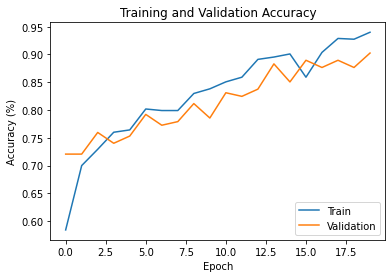

In [ ]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title("Training and Validation Accuracy")
plt.ylabel("Accuracy (%)")
plt.xlabel("Epoch")
plt.legend(['Train','Validation'], loc = 'lower right')
plt.show()

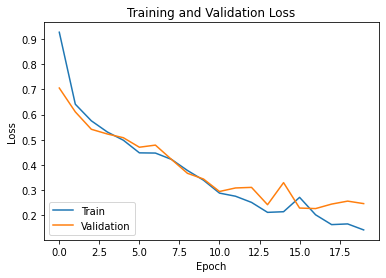

In [ ]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title("Training and Validation Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train', 'Validation'], loc = 'lower left')
plt.show()

In [ ]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_92 (Conv2D)          (None, 248, 248, 32)      2624      
                                                                 
 max_pooling2d_91 (MaxPoolin  (None, 82, 82, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_93 (Conv2D)          (None, 76, 76, 64)        100416    
                                                                 
 max_pooling2d_92 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_94 (Conv2D)          (None, 19, 19, 64)        200768    
                                                                 
 max_pooling2d_93 (MaxPoolin  (None, 6, 6, 64)       

In [ ]:
model.save("/content/drive/MyDrive/Stem Proyectp/Project/Models/model_6")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Stem Proyectp/Project/Models/model_6/assets
